In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs 

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)
coordinates

[(-17.360126146295315, -18.025009608813832),
 (78.16249475317204, 96.89689477434439),
 (-69.84586021694749, -113.08287016909216),
 (-48.808193076627674, -74.76587297474161),
 (-81.15208994166467, -26.574790242707422),
 (25.098361650230473, -128.31878330796752),
 (25.14091727937442, -51.95581958050312),
 (-56.50181408653505, -64.56972755080986),
 (-80.89399112027817, -91.29237935526575),
 (79.34612865796399, 132.2282022805312),
 (-68.95299978173838, -74.56113875841989),
 (-38.78412509874523, -81.90306339923897),
 (-42.55838282289835, 133.66418393190202),
 (84.1646008679254, -70.7799723833712),
 (-69.59496729120444, 147.5932939925333),
 (14.818392028747155, 10.352322445326678),
 (-52.31168149683705, 25.634381422756093),
 (85.59596212551725, -83.42758666473482),
 (46.509017778184415, 27.388001742098083),
 (8.194168638175285, -34.205901382819775),
 (8.710206362953613, 163.28302792344368),
 (-74.9779456861234, -3.405085178608374),
 (22.46246134500113, -130.5385254180495),
 (62.2266020681590

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

598

In [6]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1faa1314e11327f81d624275c9bcd26c


In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city

    # Log the URL, record, and set numbers and the city.
    #print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. 

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Georgetown,6.80,-58.16,80.60,74,4,4.70,GY,2020-01-05 22:34:15
1,Khatanga,71.98,102.47,-8.39,97,100,6.38,RU,2020-01-05 22:34:20
2,Punta Arenas,-53.16,-70.91,53.60,54,40,26.40,CL,2020-01-05 22:31:00
3,Coihaique,-45.58,-72.07,57.20,66,75,4.70,CL,2020-01-05 22:34:21
4,Ushuaia,-54.81,-68.31,51.80,62,40,26.40,AR,2020-01-05 22:30:58
5,Lompoc,34.64,-120.46,66.20,59,1,18.34,US,2020-01-05 22:34:21
6,Codrington,-28.95,153.24,78.80,73,40,6.93,AU,2020-01-05 22:34:21
7,Tiksi,71.64,128.87,-13.40,86,17,13.22,RU,2020-01-05 22:34:22
8,Lebu,8.96,38.73,57.20,71,75,6.93,ET,2020-01-05 22:34:22
9,Port Lincoln,-34.72,135.86,66.04,62,78,9.44,AU,2020-01-05 22:34:22


In [11]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Georgetown,GY,2020-01-05 22:34:15,6.80,-58.16,80.60,74,4,4.70
1,Khatanga,RU,2020-01-05 22:34:20,71.98,102.47,-8.39,97,100,6.38
2,Punta Arenas,CL,2020-01-05 22:31:00,-53.16,-70.91,53.60,54,40,26.40
3,Coihaique,CL,2020-01-05 22:34:21,-45.58,-72.07,57.20,66,75,4.70
4,Ushuaia,AR,2020-01-05 22:30:58,-54.81,-68.31,51.80,62,40,26.40
...,...,...,...,...,...,...,...,...,...
533,Guarapari,BR,2020-01-05 22:36:46,-20.67,-40.50,80.60,78,75,11.41
534,Bud,NO,2020-01-05 22:36:47,62.91,6.91,48.20,93,75,19.46
535,Senanga,ZM,2020-01-05 22:36:47,-16.10,23.30,71.96,73,88,3.44
536,Ondjiva,AO,2020-01-05 22:36:47,-17.07,15.73,67.80,87,100,8.05


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [16]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1578263808.9947677

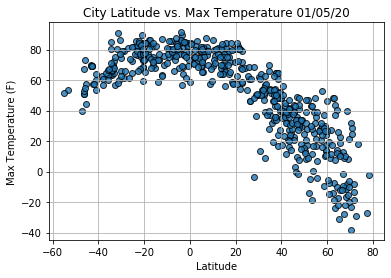

In [17]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

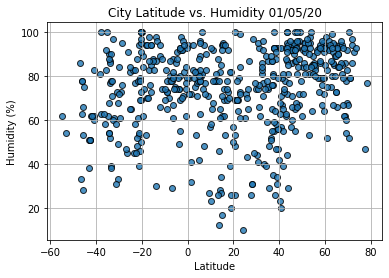

In [19]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

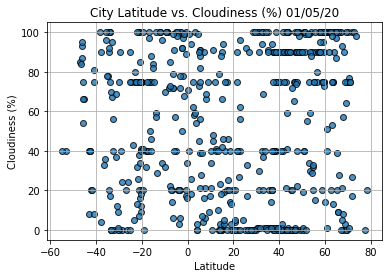

In [21]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

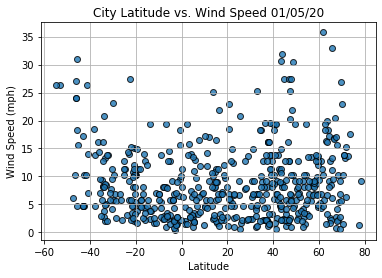

In [22]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()